In [83]:
print('test')


test


In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
dataset = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")


In [85]:
dataset.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [86]:
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')


In [87]:
dataset.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [88]:
selected_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

In [89]:
df= dataset[selected_columns]

In [90]:
df.head()


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [91]:
len(df)

9704

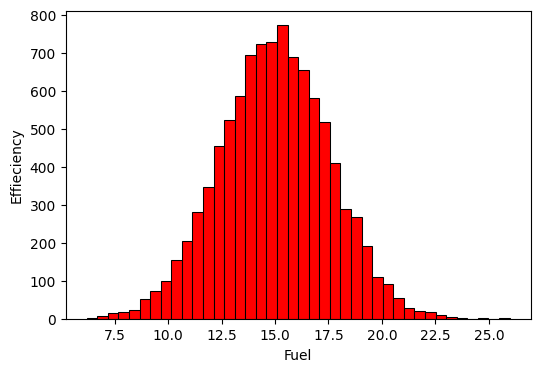

In [92]:
plt.figure(figsize=(6, 4))
sns.histplot(df.fuel_efficiency_mpg[df.fuel_efficiency_mpg<500], bins=40, color="red", alpha=1)
plt.ylabel('Effieciency')
plt.xlabel('Fuel')
plt.show()

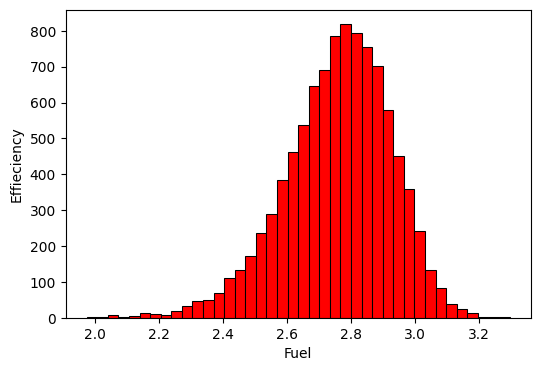

In [93]:
log_fuel_efficiency = np.log1p(df.fuel_efficiency_mpg)
plt.figure(figsize=(6, 4))
sns.histplot(log_fuel_efficiency, bins=40, color="red", alpha=1)
plt.ylabel('Effieciency')
plt.xlabel('Fuel')
plt.show()



In [94]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [95]:

df['horsepower'].median()


np.float64(149.0)

In [128]:
np.random.seed(42)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
#train, validation, test data
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [129]:
#target value
y_train_orig = df_train.fuel_efficiency_mpg.values   
y_val_orig = df_val.fuel_efficiency_mpg.values      
y_test_orig = df_test.fuel_efficiency_mpg.values

In [130]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)       # log(price + 1) for validation
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [131]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [132]:
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]
def prepare_X(df, fillNumber):
    df_num = df[base]
    df_num = df_num.fillna(fillNumber)
    X = df_num.values
    return X

In [133]:
X_train_with_zeros = prepare_X(df_train, fillNumber=0)
X_train_with_zeros

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [134]:
w_0, w = train_linear_regression(X_train_with_zeros, y_train)

In [135]:
y_pred_with_zeros_train = w_0 + X_train_with_zeros.dot(w)

In [136]:
#find mean from train data for horsepower
fillNumber =df_train['horsepower'].mean()   
print(fillNumber)
X_train_with_mean = prepare_X(df_train, fillNumber)
X_train_with_mean

149.54476367006487


array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [137]:
w_0, w = train_linear_regression(X_train_with_mean, y_train)
y_pred_with_mean_train = w_0 + X_train_with_mean.dot(w)


In [138]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [140]:
rmse_with_zeros_train = rmse(y_train, y_pred_with_zeros_train)
rmse_with_mean_train = rmse(y_train, y_pred_with_mean_train)
print(round(rmse_with_zeros_train, 2)) 
print(round(rmse_with_mean_train, 2))

0.04
0.04


In [142]:
X_val_with_zeros = prepare_X(df_val, fillNumber=0)
X_val_with_mean = prepare_X(df_val, fillNumber)
w_0, w = train_linear_regression(X_val_with_zeros, y_val)
y_pred_with_zeros_val = w_0 + X_val_with_zeros.dot(w)
w_0, w = train_linear_regression(X_val_with_mean, y_val)
y_pred_with_mean_val = w_0 + X_val_with_mean.dot(w)
rmse_with_zeros_val = rmse(y_val, y_pred_with_zeros_val)
rmse_with_mean_val = rmse(y_val, y_pred_with_mean_val)
print(round(rmse_with_zeros_val, 2)) 
print(round(rmse_with_mean_val, 2)) 

0.04
0.04


In [143]:
X_test_with_zeros = prepare_X(df_test, fillNumber=0)
X_test_with_mean = prepare_X(df_test, fillNumber)
w_0, w = train_linear_regression(X_test_with_zeros, y_val)
y_pred_with_zeros_test = w_0 + X_test_with_zeros.dot(w)
w_0, w = train_linear_regression(X_test_with_mean, y_val)
y_pred_with_mean_test = w_0 + X_test_with_mean.dot(w)
rmse_with_zeros_test = rmse(y_val, y_pred_with_zeros_val)
rmse_with_zeros_test = rmse(y_val, y_pred_with_mean_val)
print(round(rmse_with_zeros_test, 2)) 
print(round(rmse_with_zeros_test, 2)) 

0.04
0.04


In [144]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [148]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_with_zeros, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f, %.2f, %.2f' % (r, w_0, w[0], w[1], w[2], w[3]))

    0, 3.66, 0.00, 0.00, -0.00, 0.00
 0.01, 3.17, 0.00, 0.00, -0.00, 0.00
  0.1, 1.43, 0.00, 0.00, -0.00, 0.00
    1, 0.22, 0.00, 0.00, -0.00, 0.00
    5, 0.05, 0.00, 0.00, -0.00, 0.00
   10, 0.02, 0.00, 0.00, -0.00, 0.00
  100, 0.00, 0.00, 0.00, -0.00, 0.00


In [152]:
# Prepare validation data
X_val = prepare_X(df_val, fillNumber=0)

# Try different regularization values
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # Train on training set
    w_0, w = train_linear_regression_reg(X_train_with_zeros, y_train, r=r)
    
    # Predict on validation set
    y_pred_val = w_0 + X_val.dot(w)
    
    # Calculate RMSE on validation set
    rmse_val = rmse(y_val, y_pred_val)
    
    print(f'r={r:>6}, RMSE={round(rmse_val, 2):.4f}')

r=     0, RMSE=0.0400
r=  0.01, RMSE=0.0400
r=   0.1, RMSE=0.0400
r=     1, RMSE=0.0400
r=     5, RMSE=0.0400
r=    10, RMSE=0.0400
r=   100, RMSE=0.0400


In [165]:
def split_data(df, seed, target_column='fuel_efficiency_mpg'):
    # Set seed and split data
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    
    # Split into train/val/test
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Prepare target variable
    y_train = df_train[target_column].values
    y_val = df_val[target_column].values
    y_test = df_test[target_column].values
    
    # Remove target from features
    del df_train[target_column]
    del df_val[target_column]
    del df_test[target_column]
    
    return df_train, df_val, df_test, y_train, y_val, y_test


In [168]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)
    X_train = prepare_X(df_train, fillNumber=0)
    X_val = prepare_X(df_val, fillNumber=0)
    w_0, w = train_linear_regression(X_val, y_val)
    y_pred_val = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred_val)
    rmse_scores.append(rmse_val)

print(rmse_scores)

result =np.std(rmse_scores)
print(round(result, 3))


[np.float64(0.5202118379639954), np.float64(0.5205708723490043), np.float64(0.5219900412754929), np.float64(0.5149734940801596), np.float64(0.5100238269439804), np.float64(0.5253124719632507), np.float64(0.5308826856445142), np.float64(0.5073280576404412), np.float64(0.5123062132804673), np.float64(0.5124416235276358)]
0.007


In [171]:
df_train_temp, df_val_temp, df_test_temp, y_train_temp, y_val_temp, y_test_temp = split_data(df, seed=9)
df_train_full = pd.concat([df_train_temp, df_val_temp])
y_train_full = np.concatenate([y_train_temp, y_val_temp])


# Prepare X with missing values filled with 0
X_train_full = prepare_X(df_train_full, fillNumber=0)
X_test = prepare_X(df_test_temp, fillNumber=0)

w_0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)
y_pred_train_full = w_0 + X_train_full.dot(w)

y_pred_test = w_0 + X_test.dot(w)
rmse_test = rmse(y_test_temp, y_pred_test)
print(round(rmse_test, 2))






0.52
